# DS-SF-25 | Unit Project 1: Research Design Write-Up

In this first unit project you will create a framework to scope out data science projects.  This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

## Part A.  Evaluate the following problem statement:

> "Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and `activity score 1 = active user`, `0 = inactive user`) based on Hooli data from January-April 2015."

> ### Question 1.  What is the outcome?

> ### Question 2.  What are the predictors/covariates?

Answer: Demographic data collected at sign-up and usage data collected from Hooli.

> ### Question 3.  What timeframe is this data relevent for?

Answer: January to April 2015.

> ### Question 4.  What is the hypothesis?

Answer: Demographic and usage data can predict whether a free-tier customer becomes a paying customer.

## Part B.  Let's start exploring our UCLA dataset and answer some simple questions:

In [1]:
import os
import pandas as pd
import seaborn as sns

%matplotlib inline

df = pd.read_csv(os.path.join('..', '..', 'dataset', 'ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [2]:
[df[c].dtype for c in df.columns]

[dtype('int64'), dtype('float64'), dtype('float64'), dtype('float64')]

> ### Question 5.  Create a data dictionary.

Variable | Description | Type of Variable
---|---|---
admit | 0 = not admitted to UCLA, 1 = admitted to UCLA; binary (stored as integer)| Categorical
gre | Graduate Record Examination score; integer (stored as float) | Continuous
gpa | Grade Point Average; float | Continuous
prestige | Prestige of an applicant's alta mater (1-4, w/ 1 as highest); integer (stored as float) | Categorical

> ### Question 6.  What is the outcome?

Answer: Predict admission or non-admission to UCLA.

> ### Question 7.  What are the predictors/covariates?

Answer: GRE, GPA, and school prestige.

> ### Question 8.  What timeframe is this data relevent for?

Answer: The timeframe is not specified for this data set in the accompanying documentation (README.md).

> ### Question 9.  What is the hypothesis?

Answer: GRE, GPA, and school prestige can predict admittance to UCLA.

> ### Question 10.  What's the problem statement?

> Using your answers to the above questions, write a well-formed problem statement.

Answer: Determine if a student will be admitted to UCLA based on their GRE, GPA, and a school prestige ranking using a dataset collected over an unspecified period.

> ### Bonus 1.  What's an *alternative* problem statement?

Predict the 'prestige' (ranked 1-4, 1 being highest) of a student's undergraduate school based on their admittance to UCLA's graduate program (0=no, 1=yes), GRE, and GPA scores.

## Part C.  Create an exploratory analysis plan by answering the following questions:

Because the answers to these questions haven't yet been covered in class yet, this section is optional.  This is by design.  By having you guess or look around for these answers will help make sense once we cover this material in class.  You will not be penalized for wrong answers but we encourage you to give it a try!

> ### Question 11. What are the goals of the exploratory analysis?

Answer:  
- Maximize insight into a data set
- Uncover underlying structure
- Extract important variables
- Detect outliers and anomalies
- Test underlying assumptions
- Develop computationaly efficient models

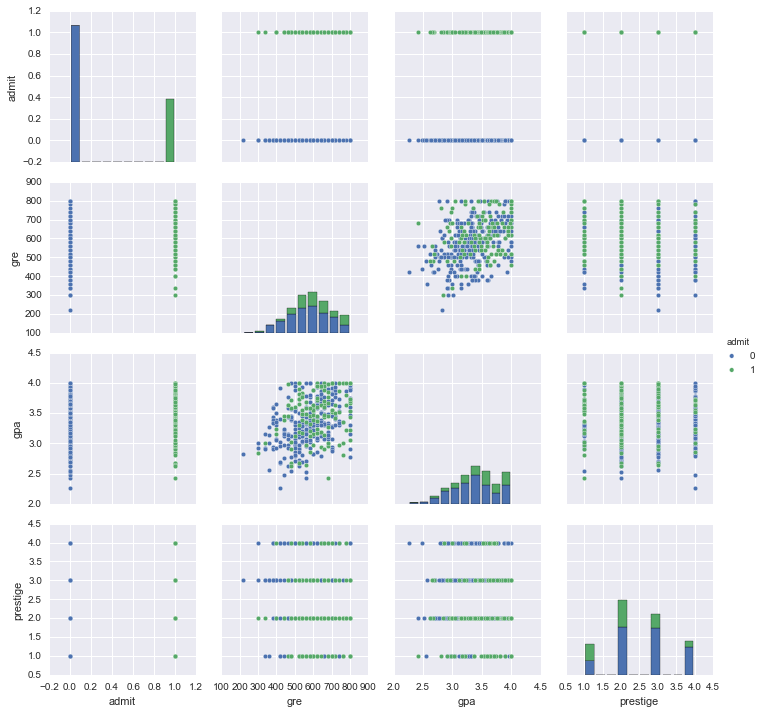

In [3]:
sns.pairplot(df.dropna(), hue='admit')

In [4]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [5]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


> ### Question 12.  What are the assumptions of the distribution of data?

We assume the sampling distribution of the mean is normal. However, in this data set GRE and GPA are not normal since they both have hard limits (0-4 and 0-800 respectively), and people on the lower end of these scores wouldn't be applying to graduate school in the first place.

> ### Question 13.  How will determine the distribution of your data?

Plot histograms of each field.

> ### Question 14.  How might outliers impact your analysis?

Outliers can skew correlation coefficients yielding erronious correlations in the data.

> ### Question 15.  How will you test for outliers?

Boxplots can be useful for detecting outliers.

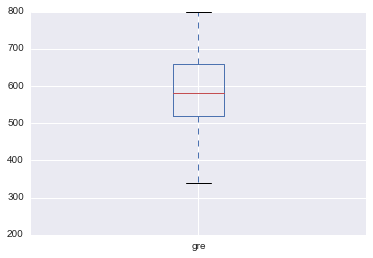

In [10]:
axes = df.boxplot('gre',return_type='axes')

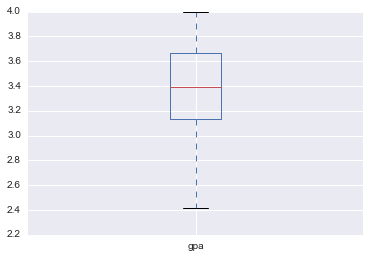

In [11]:
axes = df.boxplot('gpa',return_type='axes')

> ### Question 16.  What is colinearity?

Collinearity is a phenomenon in which two or more predictor variables in a multiple regression model are highly correlated, meaning that one can be linearly predicted from the others with a substantial degree of accuracy. In this situation the coefficient estimates of the multiple regression may change erratically in response to small changes in the model or the data. A multiple regression model with correlated predictors can indicate how well the entire bundle of predictors predicts the outcome variable, but it may not give valid results about any individual predictor, or about which predictors are redundant with respect to others.

> ### Question 17.  How will you test for colinearity?

In [6]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


Looking at the pairwise correlation of columns, gre and gpa appear to only be slightly correlated with a value around 0.38.

> ### Question 18.  What is your exploratory analysis plan?

> Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis one year from now.

Answer: